In [23]:
import sys
sys.path.append('..')

from keras.utils import np_utils
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import shutil
import importlib

%matplotlib inline
from sklearn.datasets import load_files
import pandas as pd
pd.set_option("display.max_colwidth", 75)

from keras.applications.imagenet_utils import preprocess_input

from util import paths_to_tensor

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config = config)


#sys.path.append('mobilenet')
#sys.path.append('inceptionresnetv2')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# inceptionresnetv2
inceptionresnetv2={
    'all_layer':{
        'test_accuracy':50.7785,
        'iteration':"6,0.738587466742,0.613630635506,0.48301960659,1.24334216959"
    },
    'fc_layer':{
        'test_accuracy': 47.2682,
        'iteration':"14,0.473403764657,1.02789971373,0.467882352927,1.0349841587"
    }
}

In [25]:
# mobilenet
mobilenet={
    'all_layer':{
        'test_accuracy':51.0784,
        'iteration':"14,0.702319133298,0.691681306375,0.481568625997,1.19486721886"
    },
    'fc_layer':{
        'test_accuracy': 48.1600,
        'iteration':"14,0.4831219851,1.01611854147,0.478372549034,1.02205708214"
    }
}


In [26]:
# vgg19_caffe
vgg19_caffe={
    'all_layer':{
        'test_accuracy':51.0179,
        'iteration':"7,0.646394600027,0.785985011523,0.505764704578,1.07157277326"
    },
    'fc_layer':{
        'test_accuracy': 50.4194,
        'iteration':"14,0.85532006099,0.353883093833,0.49172549021,1.34123736032"
    }
}


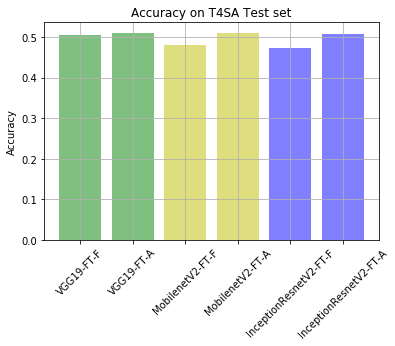

In [27]:
x_vals = ('VGG19-FT-F', 'VGG19-FT-A', 'MobilenetV2-FT-F', 'MobilenetV2-FT-A', 'InceptionResnetV2-FT-F', 'InceptionResnetV2-FT-A')
y_pos = np.arange(len(x_vals))
accuracies = [0.5042, 0.5102, 0.4816, 0.5108, 0.4727, 0.5078]

colors = ['g', 'g', 'y', 'y', 'b', 'b']
plt.bar(y_pos, accuracies, align='center', alpha=0.5, color=colors)
plt.xticks(y_pos, x_vals, rotation=45)
plt.ylabel('Accuracy')
plt.title('Accuracy on T4SA Test set')
plt.grid(True)
plt.savefig('../imgs/accuracy_t4sa_testset.png')
plt.show()

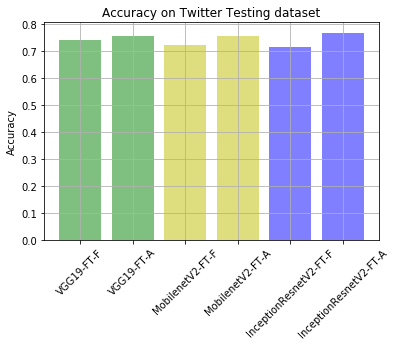

In [28]:
x_vals = ('VGG19-FT-F', 'VGG19-FT-A', 'MobilenetV2-FT-F', 'MobilenetV2-FT-A', 'InceptionResnetV2-FT-F', 'InceptionResnetV2-FT-A')
y_pos = np.arange(len(x_vals))

accuracies = [0.740363, 0.755102, 0.722222, 0.757370, 0.714286, 0.768707]
colors = ['g', 'g', 'y', 'y', 'b', 'b']
plt.bar(y_pos, accuracies, align='center', alpha=0.5, color=colors)
plt.xticks(y_pos, x_vals, rotation=45)
plt.ylabel('Accuracy')
plt.title('Accuracy on Twitter Testing dataset')
plt.grid(True)
plt.savefig('../imgs/accuracy_twitter_training_dataset.png')
plt.show()


In [29]:
# vgg19 fc layer train time
!tail -1 ../vgg19/logs/fc_layer_train_caffe_vgg19.ps.log|cut -f4 -d,

2-01:26:45


In [30]:
vgg19_fc = (2*24 + 1)*3600 + 26* 60 + 45

In [31]:
# vgg19 all layer train time
!tail -1 ../vgg19/logs/all_layer_train_caffe_vgg19.ps.log|cut -f4 -d,

23:46:30


In [32]:
vgg19_all = (23)*3600 + 26* 60 + 45

In [33]:
# mobilenet fc layer train time
!tail -1 ../mobilenet/logs/fc_layer_train_mobilenet.py.ps.log|cut -f4 -d,

2-09:27:19


In [34]:
mobilenet_fc = (2*24 + 9)*3600 + 27* 60 + 19

In [35]:
# mobilenet all layer train time
!tail -1 ../mobilenet/logs/all_layer_train_mobilenet.py.ps.log|cut -f4 -d,

1-18:41:15


In [36]:
mobilenet_all = (1*24 + 18)*3600 + 41* 60 + 15

In [37]:
# inception fc layer train time
!tail -1 ../inceptionresnetv2/logs/fc_layer_train_inceptionresnetv2.py.ps.log|cut -f4 -d,

1-18:46:17


In [38]:
inceptionresnetv2_fc = (1*24 + 18)*3600 + 46* 60 + 17

In [39]:
# inception fc layer train time
!tail -1 ../inceptionresnetv2/logs/all_layer_train_inceptionresnetv2.py.ps.log|cut -f4 -d,

21:20:46


In [40]:
inceptionresnetv2_all = (21)*3600 + 20* 60 + 46

In [41]:
values = [vgg19_fc, vgg19_all, mobilenet_fc, mobilenet_all, inceptionresnetv2_fc,inceptionresnetv2_all]

In [42]:
min_value= min(values)

In [43]:
print([round(v/min_value, 3) for v in values])

[2.316, 1.098, 2.692, 2.0, 2.004, 1.0]


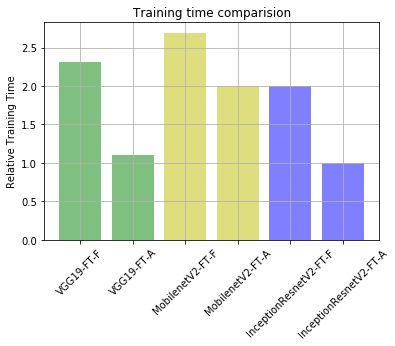

In [44]:
x_vals = ('VGG19-FT-F', 'VGG19-FT-A', 'MobilenetV2-FT-F', 'MobilenetV2-FT-A', 'InceptionResnetV2-FT-F', 'InceptionResnetV2-FT-A')
y_pos = np.arange(len(x_vals))

y_vals = [2.316, 1.098, 2.692, 2.0, 2.004, 1.0]
colors = ['g', 'g', 'y', 'y', 'b', 'b']
plt.bar(y_pos, y_vals, align='center', alpha=0.5, color=colors)
plt.xticks(y_pos, x_vals, rotation=45)
plt.ylabel('Relative Training Time')
plt.title('Training time comparision')
plt.grid(True)
plt.savefig('../imgs/training_time_comparision.png')
plt.show()